# Google stock Price prediction using LSTM

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [57]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
#keras only takes numpy array
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [58]:
raining_set = dataset_train.iloc[:, 1: 2].values

In [59]:
training_set.shape

(1258, 1)

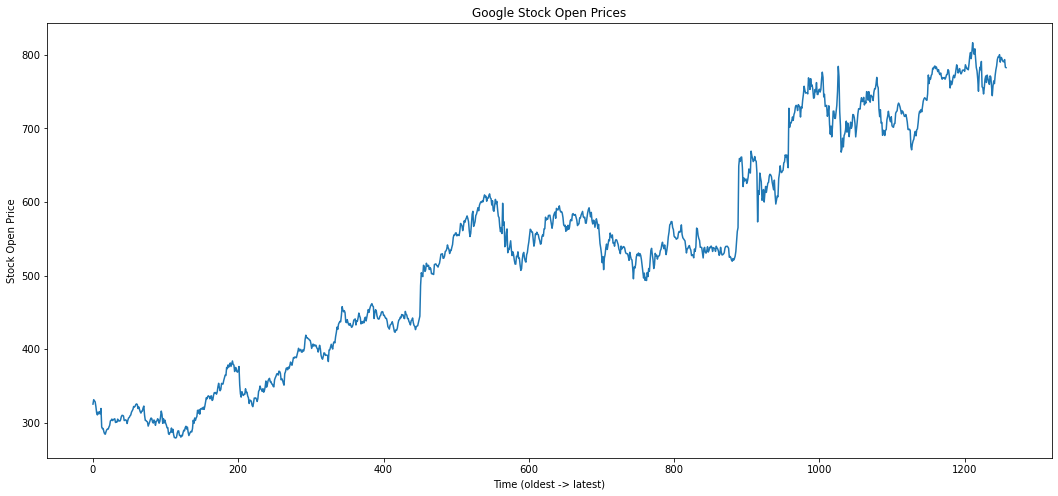

In [60]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

### Feature Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a sliding window is important

In [62]:

import numpy as np

X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

### Data Reshaing

In [63]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

### Model building

In [64]:
regressor = Sequential()

Then, add the 1st LSTM layer with the Dropout layer followed.

In [65]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

Following the above same method, add 2nd, 3rd, and 4th LSTM layer

In [66]:
##add 2nd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

Finally, add the output layer. Note the last LSTM layer, return_sequences is False as we will not add more LSTM layers.
The output dimension is 1 since we are predicting 1 price each time.

In [67]:
regressor.add(Dense(units = 1))

Let’s compile the RNN. For optimizer, we use Adam, a safe choice to start with. The loss function is the mean of squared errors between actual values and predictions.

In [68]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

### Model fitting

In [69]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 22s 132ms/step - loss: 0.0465
Epoch 2/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0059
Epoch 5/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0038
Epoch 13/100

RNN weights are updated every 32 stock prices with a batch size of 32
Great, now let’s execute the training. In the end, we found that starting with a loss of 0.0465, we got a loss of 0.0027 at epoch 50, to loss of 0.0014 at epoch 100 🎉🎉.

### Model prediction

In [70]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1: 2].values

### Data Processing

In [71]:
dataset_total = pd.concat((dataset_train["Open"],dataset_test["Open"]), axis = 0)

In [72]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)- 60: ].values

In [73]:
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [74]:
import numpy as np

X_test = []

for i in range(60, len(inputs)):
    X_test.append(inputs[i-60: i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))


### Model_prediction

In [75]:
predicted_stock_price = regressor.predict(X_test)

1/1 [==============================] - 4s 4s/step


In [76]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Result visualisation

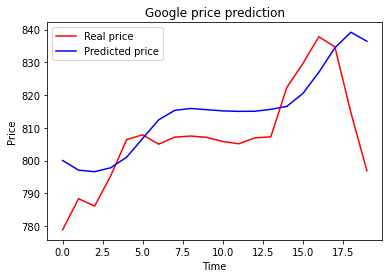

In [77]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()